In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/downloadDrive/csit-ex2-7/Day3')

Mounted at /content/drive


In [ ]:
import scipy.io as spio
!pip install GPy
import GPy
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.0MB 7.5MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633940 sha256=2e3f86f135a22009d1aaf89dce6f614619a9d455f921b4650dd1a6e0c4c0ecc3
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=ae71933535c5f5779eed1de6b9338a929caacbadafefe1e29471e585913b8805
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [ ]:
input_dim = 2
import numpy as np
X = np.load('A.npy')
kernel = GPy.kern.RBF(input_dim, ARD=True) + GPy.kern.Bias(input_dim) + GPy.kern.Linear(input_dim) + GPy.kern.White(input_dim)
model = GPy.models.BayesianGPLVM(X, input_dim, kernel=kernel, num_inducing=30)
model.optimize(messages=True, max_iters=5e3)

NameError: ignored

{'imshow': <matplotlib.image.AxesImage at 0x7f0add1796d8>,
 'scatter': [<matplotlib.collections.PathCollection at 0x7f0add1797f0>]}

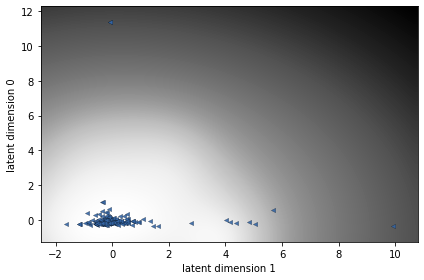

In [ ]:
model.plot_latent()

In [6]:
def load_data(path):
    text = []
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            text.append(line)
    return text
from sklearn.feature_extraction.text import TfidfVectorizer

text_path = 'news20150929.txt'
data = np.array(load_data(text_path))
print(data.shape)
vectorizer = TfidfVectorizer(max_df=0.9)
X = vectorizer.fit_transform(data)

(305,)


In [7]:
X.shape

(305, 3024)

In [9]:
X = X.toarray()
print(type(X))

<class 'numpy.ndarray'>


{'imshow': <matplotlib.image.AxesImage at 0x7f0adb224a20>,
 'scatter': [<matplotlib.collections.PathCollection at 0x7f0adb224b00>]}

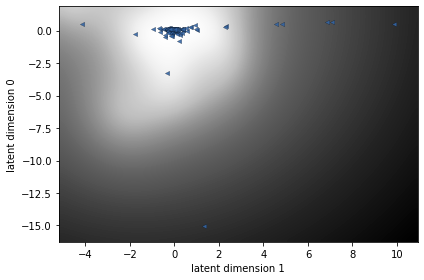

In [10]:
kernel = GPy.kern.RBF(input_dim, ARD=True) + GPy.kern.Bias(input_dim) + GPy.kern.Linear(input_dim) + GPy.kern.White(input_dim)
model = GPy.models.BayesianGPLVM(X, input_dim, kernel=kernel, num_inducing=30)
model.optimize(messages=True, max_iters=5e3)
model.plot_latent()

 /usr/local/lib/python3.6/dist-packages/GPy/util/pca.py:52: RuntimeWarning:invalid value encountered in subtract


ValueError: ignored

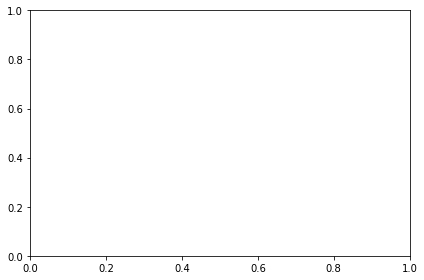

In [13]:
X = np.array( [[ 1e-10 if num==0 else num for num in x] for x in X] )
kernel = GPy.kern.RBF(input_dim, ARD=True) + GPy.kern.Bias(input_dim) + GPy.kern.Linear(input_dim) + GPy.kern.White(input_dim)
model = GPy.models.BayesianGPLVM(X, input_dim, kernel=kernel, num_inducing=30)
model.optimize(messages=True, max_iters=5e3)
model.plot_latent()

{'imshow': <matplotlib.image.AxesImage at 0x7f0ad3394908>,
 'scatter': [<matplotlib.collections.PathCollection at 0x7f0ad33949e8>]}

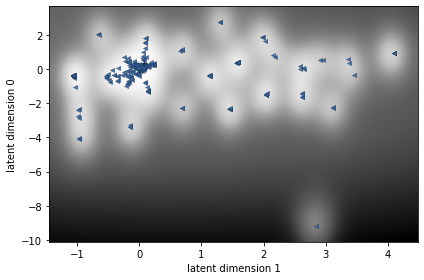

In [16]:
X = np.load('A.npy')
X = np.array( [[ 1e-10 if num==0 else num for num in x] for x in X] )
kernel = GPy.kern.RBF(input_dim, ARD=True) + GPy.kern.Linear(input_dim)
model = GPy.models.BayesianGPLVM(X, input_dim, kernel=kernel, num_inducing=30)
model.optimize(messages=True, max_iters=5e3)
model.plot_latent()